# Suicide Rates Overview 1985 to 2016

Dataset containing data for suicide numbers for countries and dozen different factors.

Goal is to look for and find any correlations with the suicide rates/cases and different factors.
Like age, country, GDP and gender.
- **Find what type of person has a higher likely hood of suicide and who has least likely hood**

Some of the points to check
1. Trends for suicide rates globaly over time.
2. Trends for suicide rates for different demographics, such as gender, age, generation etc..
3. Trends for economics 
4. Trends for population
5. Trends for population and gdp/GDPpc
6. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("SuicideRates.csv", dtype={
    "year": int, "sex": "category", "age": "category", 
    "suicides_no": int, "population": int, "suicides/100k pop": float, 
    "country-year": str, "HDI for year": float, "gdp_per_capita ($)": int,
    "generation": "category"
})
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.dtypes

C:\Users\matti\AppData\Local\Temp\ipykernel_17444\4247177000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


country                 object
year                     int32
sex                   category
age                   category
suicides_no              int32
population               int32
suicides/100k pop      float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int32
generation            category
dtype: object

In [2]:
# Rename the column to remove leading/trailing spaces and "( $)" part
df.rename(columns=lambda x: x.strip().replace(" ($)", ""), inplace=True)

# Remove non-numeric characters and convert to float
df["gdp_for_year"] = df["gdp_for_year"].replace(r"[\$,]", "", regex=True).astype(float)

# Display the data types after conversion
print(df.dtypes)

country                object
year                    int32
sex                  category
age                  category
suicides_no             int32
population              int32
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year          float64
gdp_per_capita          int32
generation           category
dtype: object


In [3]:
# Check for missing values
print("Check NULL Values")
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate rows:", df.duplicated().sum())

Check NULL Values
country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64
Duplicate rows: 0


In [4]:
# Check unique values in the "gender" column
print(df["sex"].unique())

# Check unique values in the "country" column
print(df["country"].unique())
print(len(df["country"].unique()))

['male', 'female']
Categories (2, object): ['female', 'male']
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'S

In [5]:
# Remove "years" text part from the "age" column
df["age"] = df["age"].str.replace(" years", "")

# Extract lower and upper limits of age range from the "age" column
df[["age_lower", "age_upper"]] = df["age"].str.split("-", expand=True)
# Leave the upper limit as None and not fill it to avoid introducing bias

df["age_lower"] = df["age_lower"].str.replace("+", "")

# Convert "age_lower" column to int
df["age_lower"] = df["age_lower"].astype(int)
df["age_upper"] = df["age_upper"].astype(float)

# Convert 'age' column to categorical data type with custom sorting based on the lower limit
age_categories = ["5-14", "15-24", "25-34", "35-54", "55-74", "75+"]
df["age"] = pd.Categorical(df["age"], categories=age_categories, ordered=True)

df

country  year     sex    age  suicides_no  population  \
0         Albania  1987    male  15-24           21      312900   
1         Albania  1987    male  35-54           16      308000   
2         Albania  1987  female  15-24           14      289700   
3         Albania  1987    male    75+            1       21800   
4         Albania  1987    male  25-34            9      274300   
...           ...   ...     ...    ...          ...         ...   
27815  Uzbekistan  2014  female  35-54          107     3620833   
27816  Uzbekistan  2014  female    75+            9      348465   
27817  Uzbekistan  2014    male   5-14           60     2762158   
27818  Uzbekistan  2014  female   5-14           44     2631600   
27819  Uzbekistan  2014  female  55-74           21     1438935   

       suicides/100k pop    country-year  HDI for year   gdp_for_year  \
0                   6.71     Albania1987           NaN  2156624900.00   
1                   5.19     Albania1987           NaN  2156624900.00   
2                   4.83     Albania1987           NaN  2156624900.00   
3                   4.59     Albania1987           NaN  2156624900.00   
4                   3.28     Albania1987           NaN  2156624900.00   
...                  ...             ...           ...            ...   
27815               2.96  Uzbekistan2014          0.68 63067077179.00   
27816               2.58  Uzbekistan2014          0.68 63067077179.00   
27817               2.17  Uzbekistan2014          0.68 63067077179.00   
27818               1.67  Uzbekistan2014          0.68 63067077179.00   
27819               1.46  Uzbekistan2014          0.68 63067077179.00   

       gdp_per_capita       generation  age_lower  age_upper  
0                 796     Generation X         15      24.00  
1                 796           Silent         35      54.00  
2                 796     Generation X         15      24.00  
3                 796  G.I. Generation         75        NaN  
4                 796          Boomers         25      34.00  
...               ...              ...        ...        ...  
27815            2309     Generation X         35      54.00  
27816            2309           Silent         75        NaN  
27817            2309     Generation Z          5      14.00  
27818            2309     Generation Z          5      14.00  
27819            2309          Boomers         55      74.00  

[27820 rows x 14 columns]

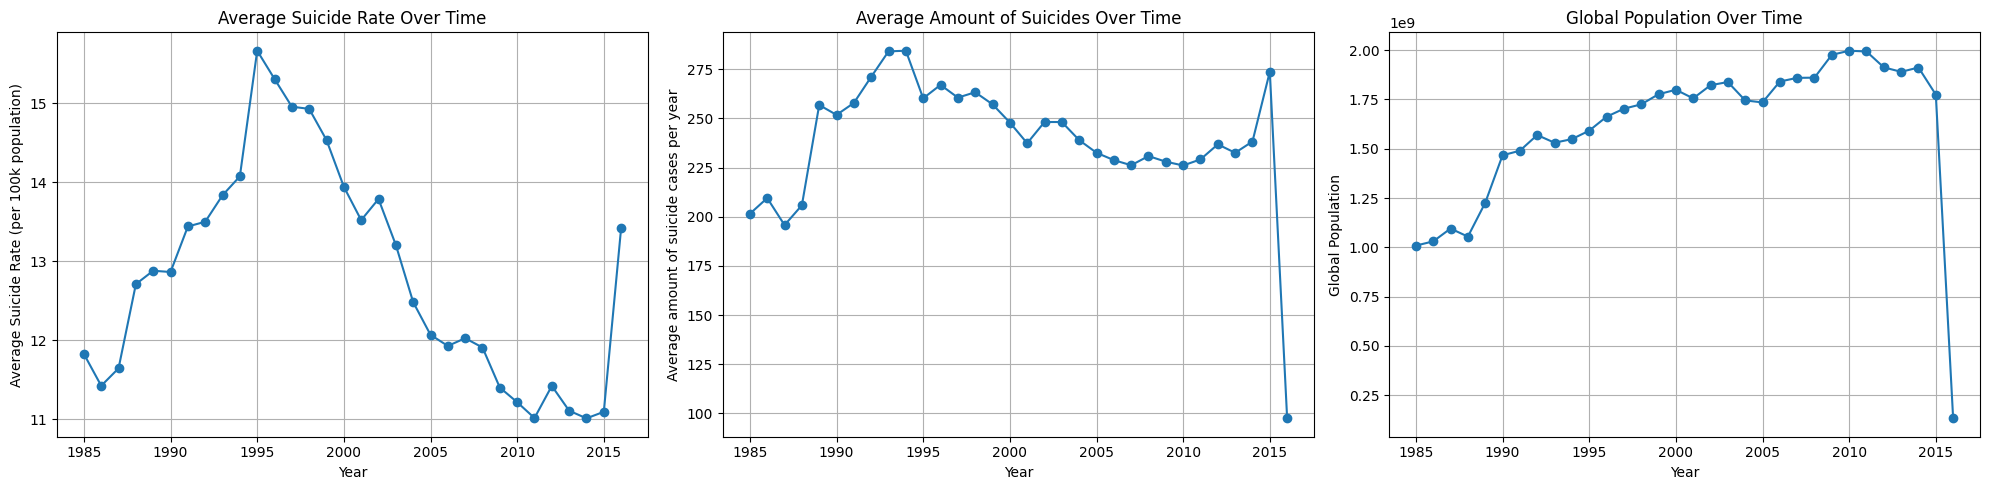

In [6]:
# 1. Trends for suicide rates globaly over time.

# Average suicide rates globaly for each year
average_suicide_rate = df.groupby("year")["suicides/100k pop"].mean()

# Average amount of suicides globaly yearly
average_suicide_amount = df.groupby("year")["suicides_no"].mean()

#total global population per year
total_population = df.groupby("year")["population"].sum()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot the average suicide rate over time
axes[0].plot(average_suicide_rate.index, average_suicide_rate.values, marker="o", linestyle="-")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Suicide Rate (per 100k population)")
axes[0].set_title("Average Suicide Rate Over Time")
axes[0].grid(True)

# Plot the average amount of suicide cases yearly over time
axes[1].plot(average_suicide_amount.index, average_suicide_amount.values, marker="o", linestyle="-")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Average amount of suicide cases per year")
axes[1].set_title("Average Amount of Suicides Over Time")
axes[1].grid(True)

# Plot the global population over time
axes[2].plot(total_population.index, total_population.values, marker="o", linestyle="-")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Global Population")
axes[2].set_title("Global Population Over Time")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

**Suicide rates and cases globaly over time trends**

We can observe from the data given that thre was a very significant rise in suicide rates from the years 1987 to 1995 where the rate peaked.
From just this data the cause is unknown.
After 1995 all the way till 2015 the suicide rates globaly had a steady decrese and fell back to a level even lower than the previous trough(lowest point).
From the data we have we can draw a general conclusion that the suicide rates globaly seem to down ward trend overtime with some increases in between.

When checking the total populationwe get globaly 
notes seems to be missing numbers for the total population of 2016 since it dips much more than it should do normally
- temp
- tasks: CHECK FOR WHICH COUNTRIES WHERE 2016 RECORDS ARE MISSING 

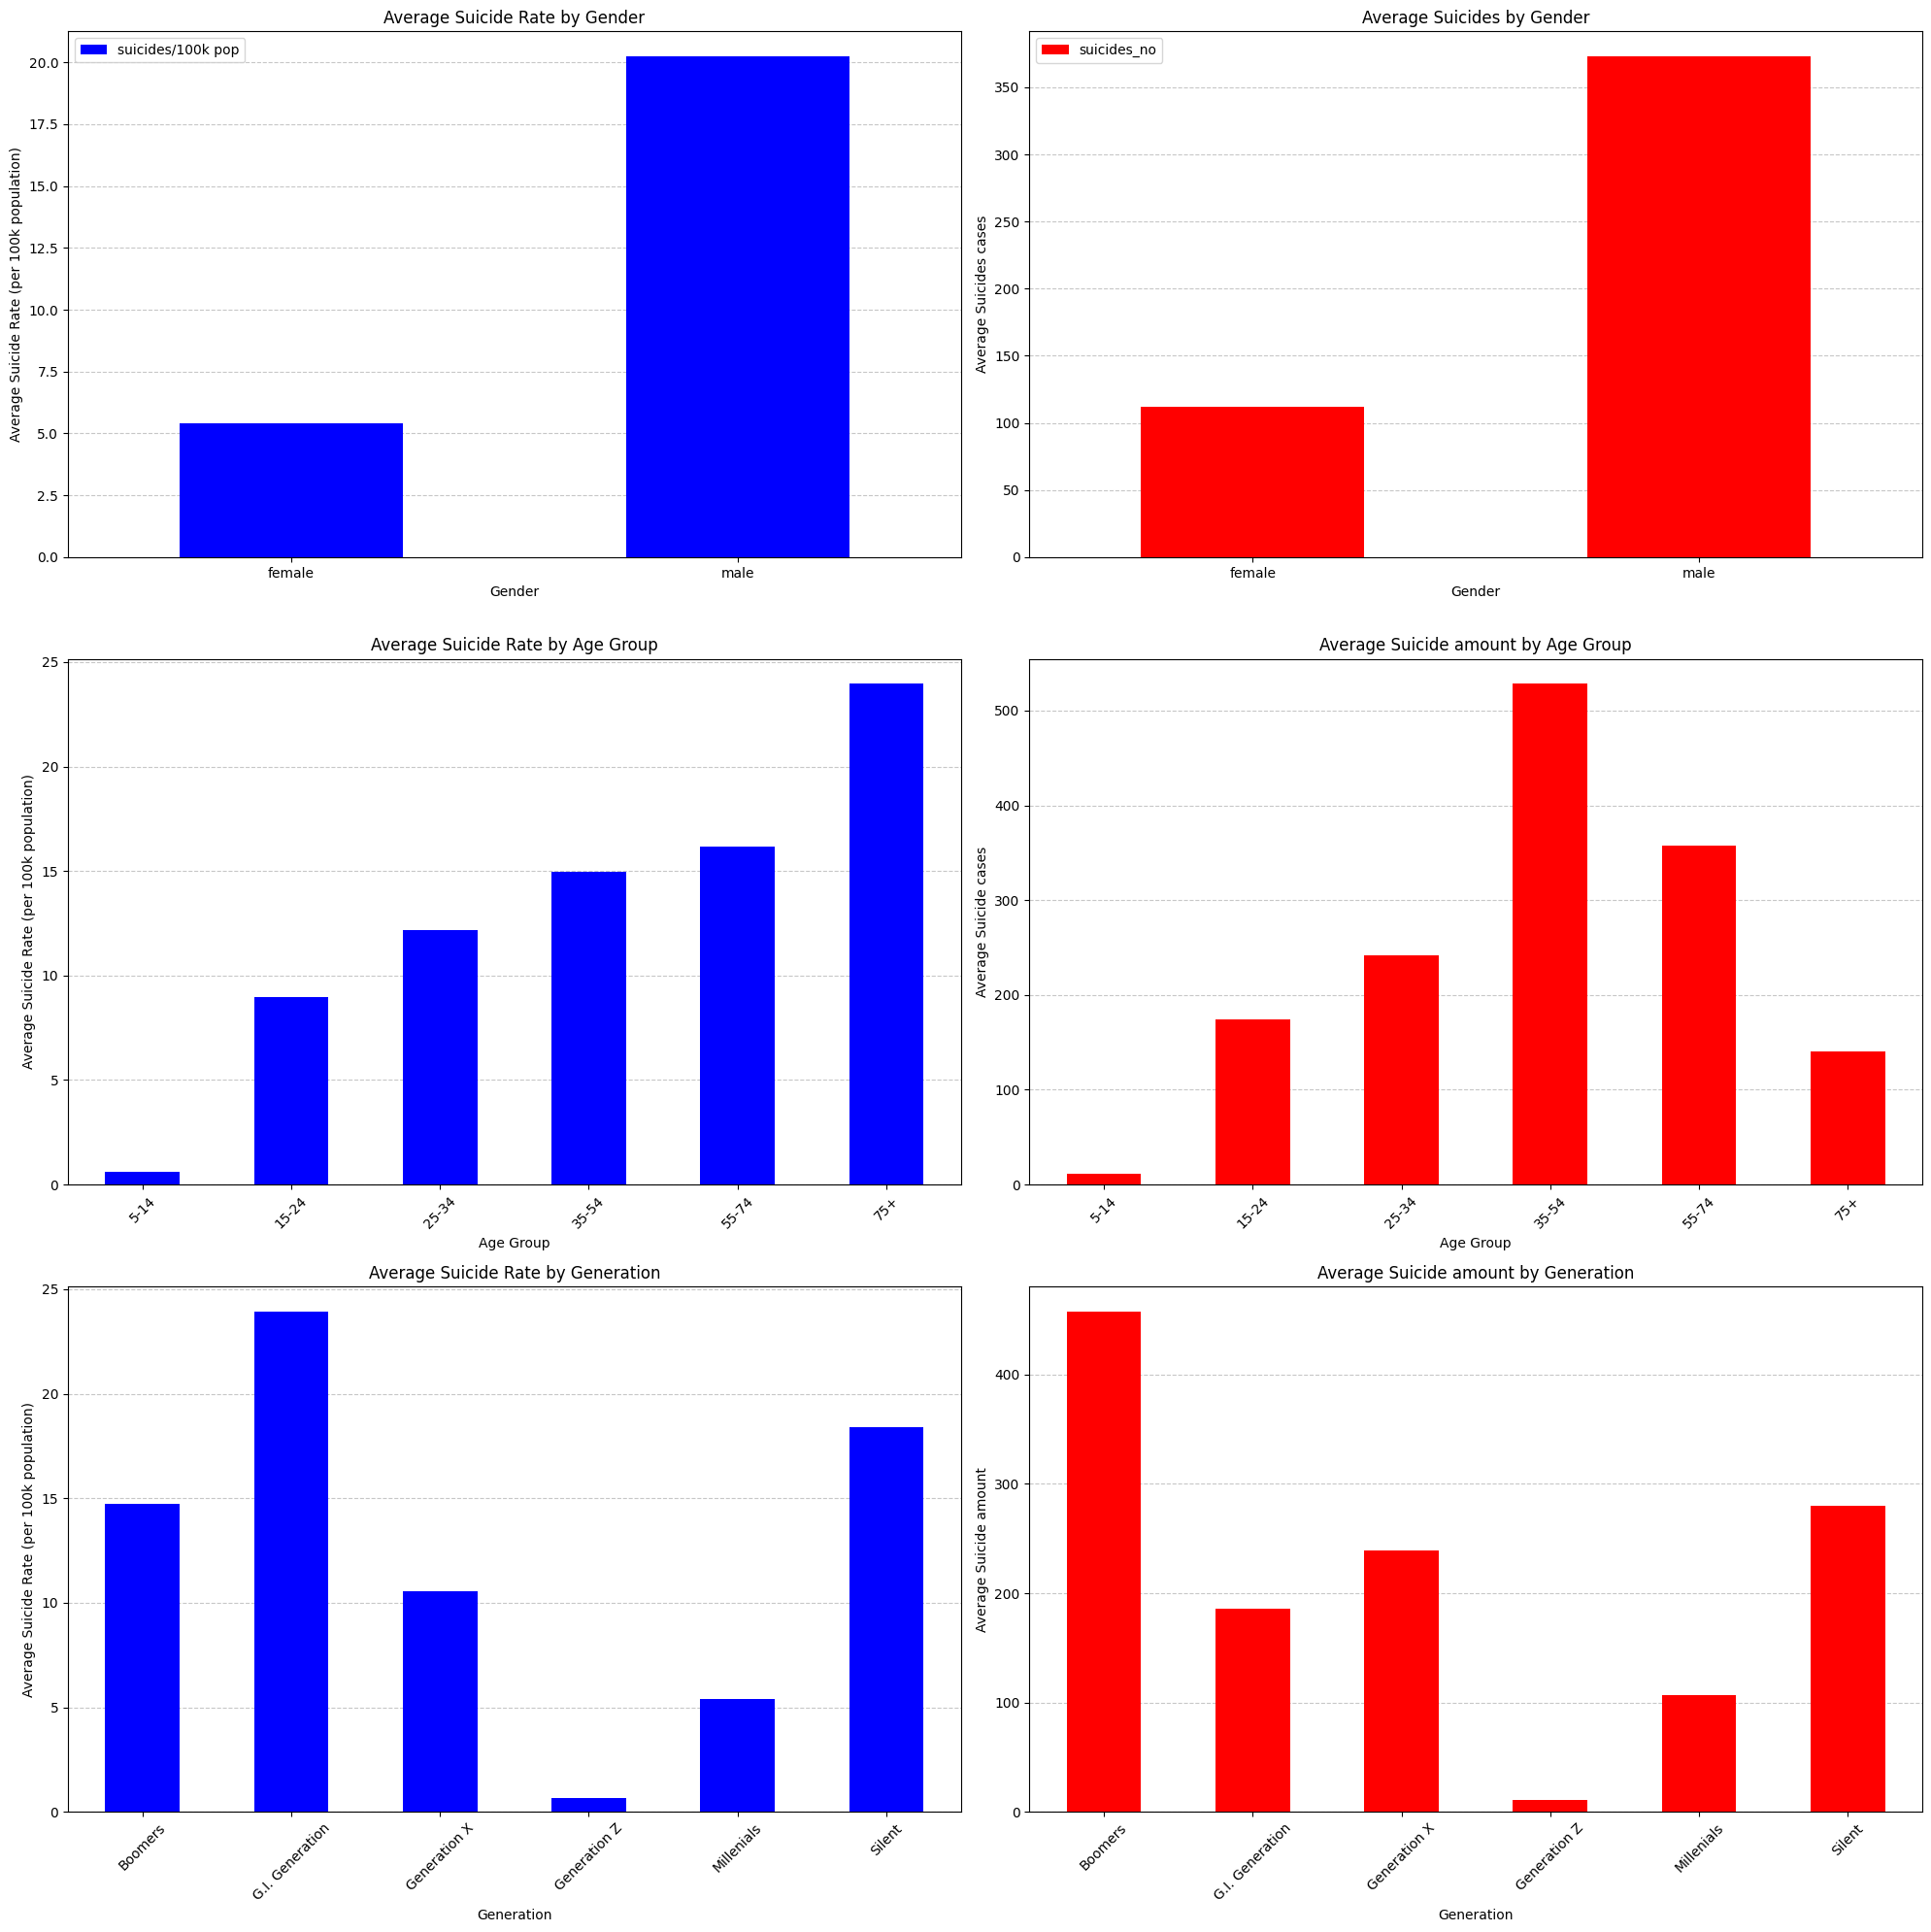

In [7]:
# 2. Trends for suicide rates for different demographics, such as gender, age, generation etc..

# Create bar charts showing the suicide rates broken down by sex
sex_suicide_rates = df.groupby("sex", observed=False)[["suicides/100k pop"]].mean()
#sex_suicide_amount = df.groupby("sex")[["suicides_no"]].mean()

fig, axes =plt.subplots(3, 2, figsize=(20,20))

sex_suicide_rates.plot(kind="bar", ax=axes[0,0], rot=0, color="b")
axes[0,0].set_xlabel("Gender")
axes[0,0].set_ylabel("Average Suicide Rate (per 100k population)")
axes[0,0].set_title("Average Suicide Rate by Gender")

# Create bar charts showing the suicide rates broken down by sex
sex_suicide_amount = df.groupby("sex", observed=False)[["suicides_no"]].mean()

sex_suicide_amount.plot(kind="bar", ax=axes[0,1] , rot=0, color="r")
axes[0,1].set_xlabel("Gender")
axes[0,1].set_ylabel("Average Suicides cases")
axes[0,1].set_title("Average Suicides by Gender")


# Group by 'age' and calculate the mean suicide rate
age_group_suicide_rates = df.groupby("age", observed=False)["suicides/100k pop"].mean()
# Sort age groups based on the custom categorical order
age_group_suicide_amount_sorted = age_group_suicide_rates.sort_index()

age_group_suicide_amount_sorted.plot(kind="bar", ax=axes[1,0], rot=45, color="b")
axes[1,0].set_xlabel("Age Group")
axes[1,0].set_ylabel("Average Suicide Rate (per 100k population)")
axes[1,0].set_title("Average Suicide Rate by Age Group")


# Group by 'age' and calculate the mean suicide rate
age_group_suicide_amount = df.groupby("age", observed=False)["suicides_no"].mean()
# Sort age groups based on the custom categorical order
age_group_suicide_amount_sorted = age_group_suicide_amount.sort_index()

age_group_suicide_amount_sorted.plot(kind="bar", ax=axes[1, 1], rot=45, color="r")
axes[1, 1].set_xlabel("Age Group")
axes[1, 1].set_ylabel("Average Suicide cases")
axes[1, 1].set_title("Average Suicide amount by Age Group")


# Calculate the suicide rate for each generation and plot it on a bar chart
generation_suicide_rates = df.groupby("generation", observed=False)["suicides/100k pop"].mean()

generation_suicide_rates.plot(kind="bar", ax=axes[2,0], rot=45, color="b")
axes[2,0].set_xlabel("Generation")
axes[2,0].set_ylabel("Average Suicide Rate (per 100k population)")
axes[2,0].set_title("Average Suicide Rate by Generation")


# Calculate the suicide rate for each generation and plot it on a bar chart
generation_suicide_amount = df.groupby("generation", observed=False)["suicides_no"].mean()

generation_suicide_amount.plot(kind="bar", ax=axes[2,1], rot=45, color="r")
axes[2,1].set_xlabel("Generation")
axes[2,1].set_ylabel("Average Suicide amount")
axes[2,1].set_title("Average Suicide amount by Generation")

for ax in axes.flatten():
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

**Suicide rates and cases for different demographics globaly**

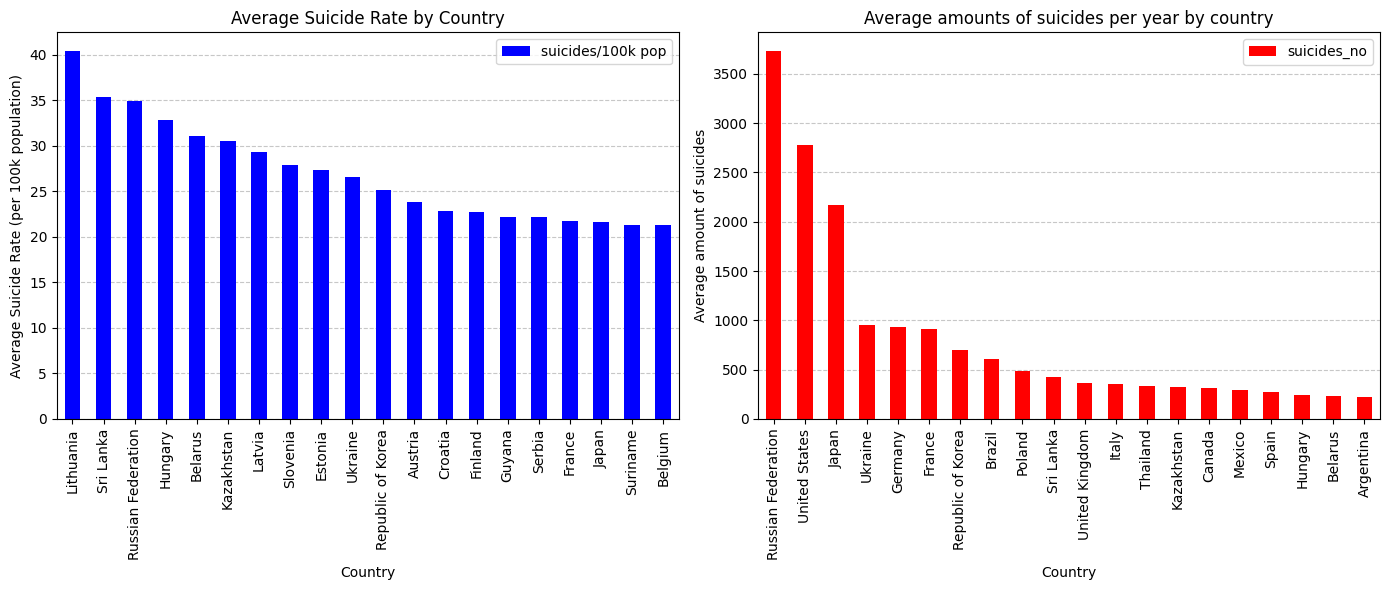

In [8]:
df_by_country = df.groupby(["country"])[["suicides/100k pop"]].mean()
df_by_country_sorted = df_by_country.sort_values(by="suicides/100k pop", ascending=False).head(20)

df_amount_by_country = df.groupby(["country"])[["suicides_no"]].mean()
sorted_amount_country = df_amount_by_country.sort_values(by="suicides_no", ascending=False).head(20)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Average Suicide Rate by Country
df_by_country_sorted.plot(kind="bar", ax=axes[0], color='b')
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Average Suicide Rate (per 100k population)")
axes[0].set_title("Average Suicide Rate by Country")

# Second subplot: Average amounts of suicides per year by country
sorted_amount_country.plot(kind="bar", ax=axes[1], color='r')
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Average amount of suicides")
axes[1].set_title("Average amounts of suicides per year by country")

for ax in axes.flatten():
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

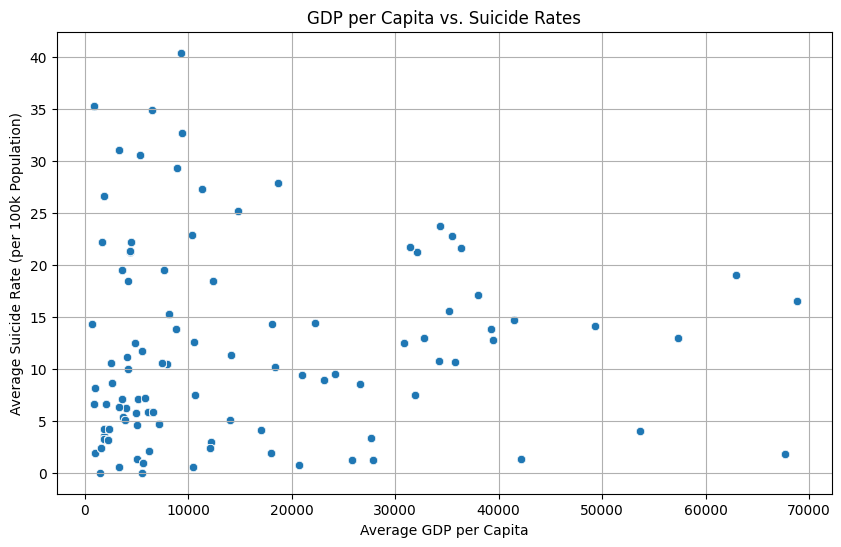

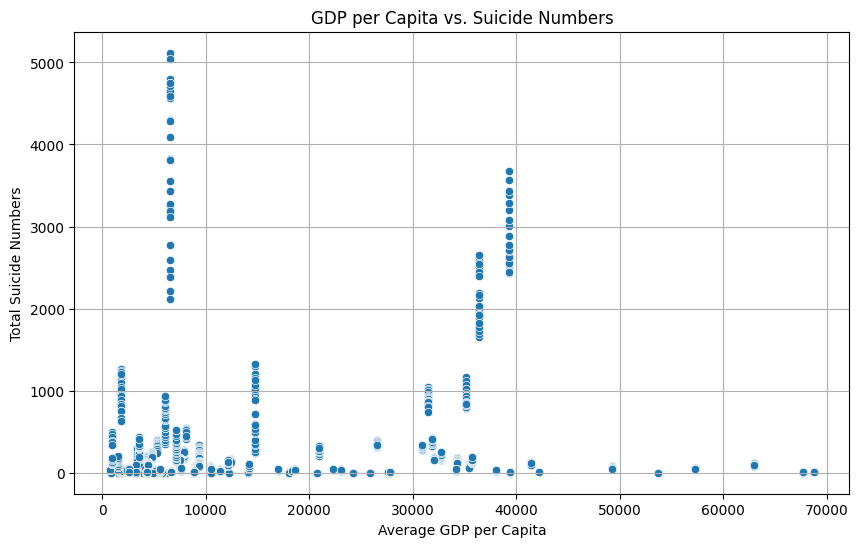

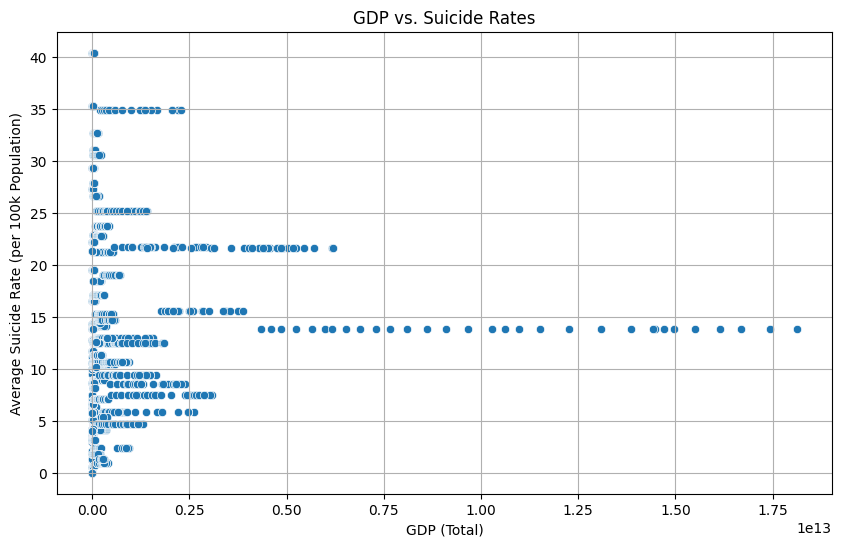

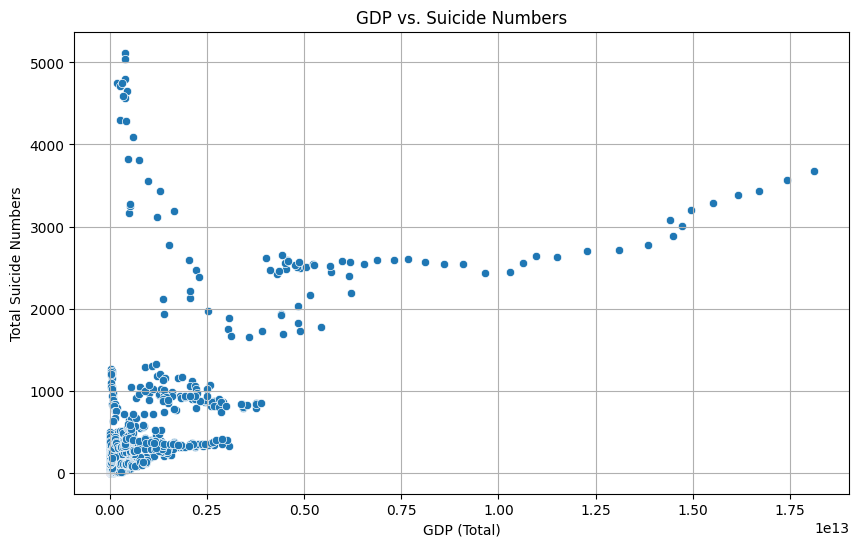

In [9]:
# Economic correlation graphs

gdp_country = df.groupby(["country", "year"])[["gdp_for_year", "gdp_per_capita", "suicides/100k pop", "suicides_no", "population"]].mean().reset_index()
# Calculate average suicide rate and average GDP per capita for each country
gdp_country['average_suicide_rate'] = gdp_country.groupby('country')['suicides/100k pop'].transform('mean')
gdp_country['average_gdp_per_capita'] = gdp_country.groupby('country')['gdp_per_capita'].transform('mean')

# Sort the DataFrame based on the average suicide rate
sorted_df = gdp_country.sort_values(by='average_suicide_rate', ascending=False)

# Scatter plot: GDP per Capita vs. Suicide Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_country, x='average_gdp_per_capita', y='average_suicide_rate')
plt.title('GDP per Capita vs. Suicide Rates')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Average Suicide Rate (per 100k Population)')
plt.grid(True)
plt.show()

# Scatter plot: GDP per Capita vs. Suicide Numbers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_country, x='average_gdp_per_capita', y='suicides_no')
plt.title('GDP per Capita vs. Suicide Numbers')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Total Suicide Numbers')
plt.grid(True)
plt.show()

# Scatter plot: GDP vs. Suicide Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_country, x='gdp_for_year', y='average_suicide_rate')
plt.title('GDP vs. Suicide Rates')
plt.xlabel('GDP (Total)')
plt.ylabel('Average Suicide Rate (per 100k Population)')
plt.grid(True)
plt.show()

# Scatter plot: GDP vs. Suicide Numbers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_country, x='gdp_for_year', y='suicides_no')
plt.title('GDP vs. Suicide Numbers')
plt.xlabel('GDP (Total)')
plt.ylabel('Total Suicide Numbers')
plt.grid(True)
plt.show()

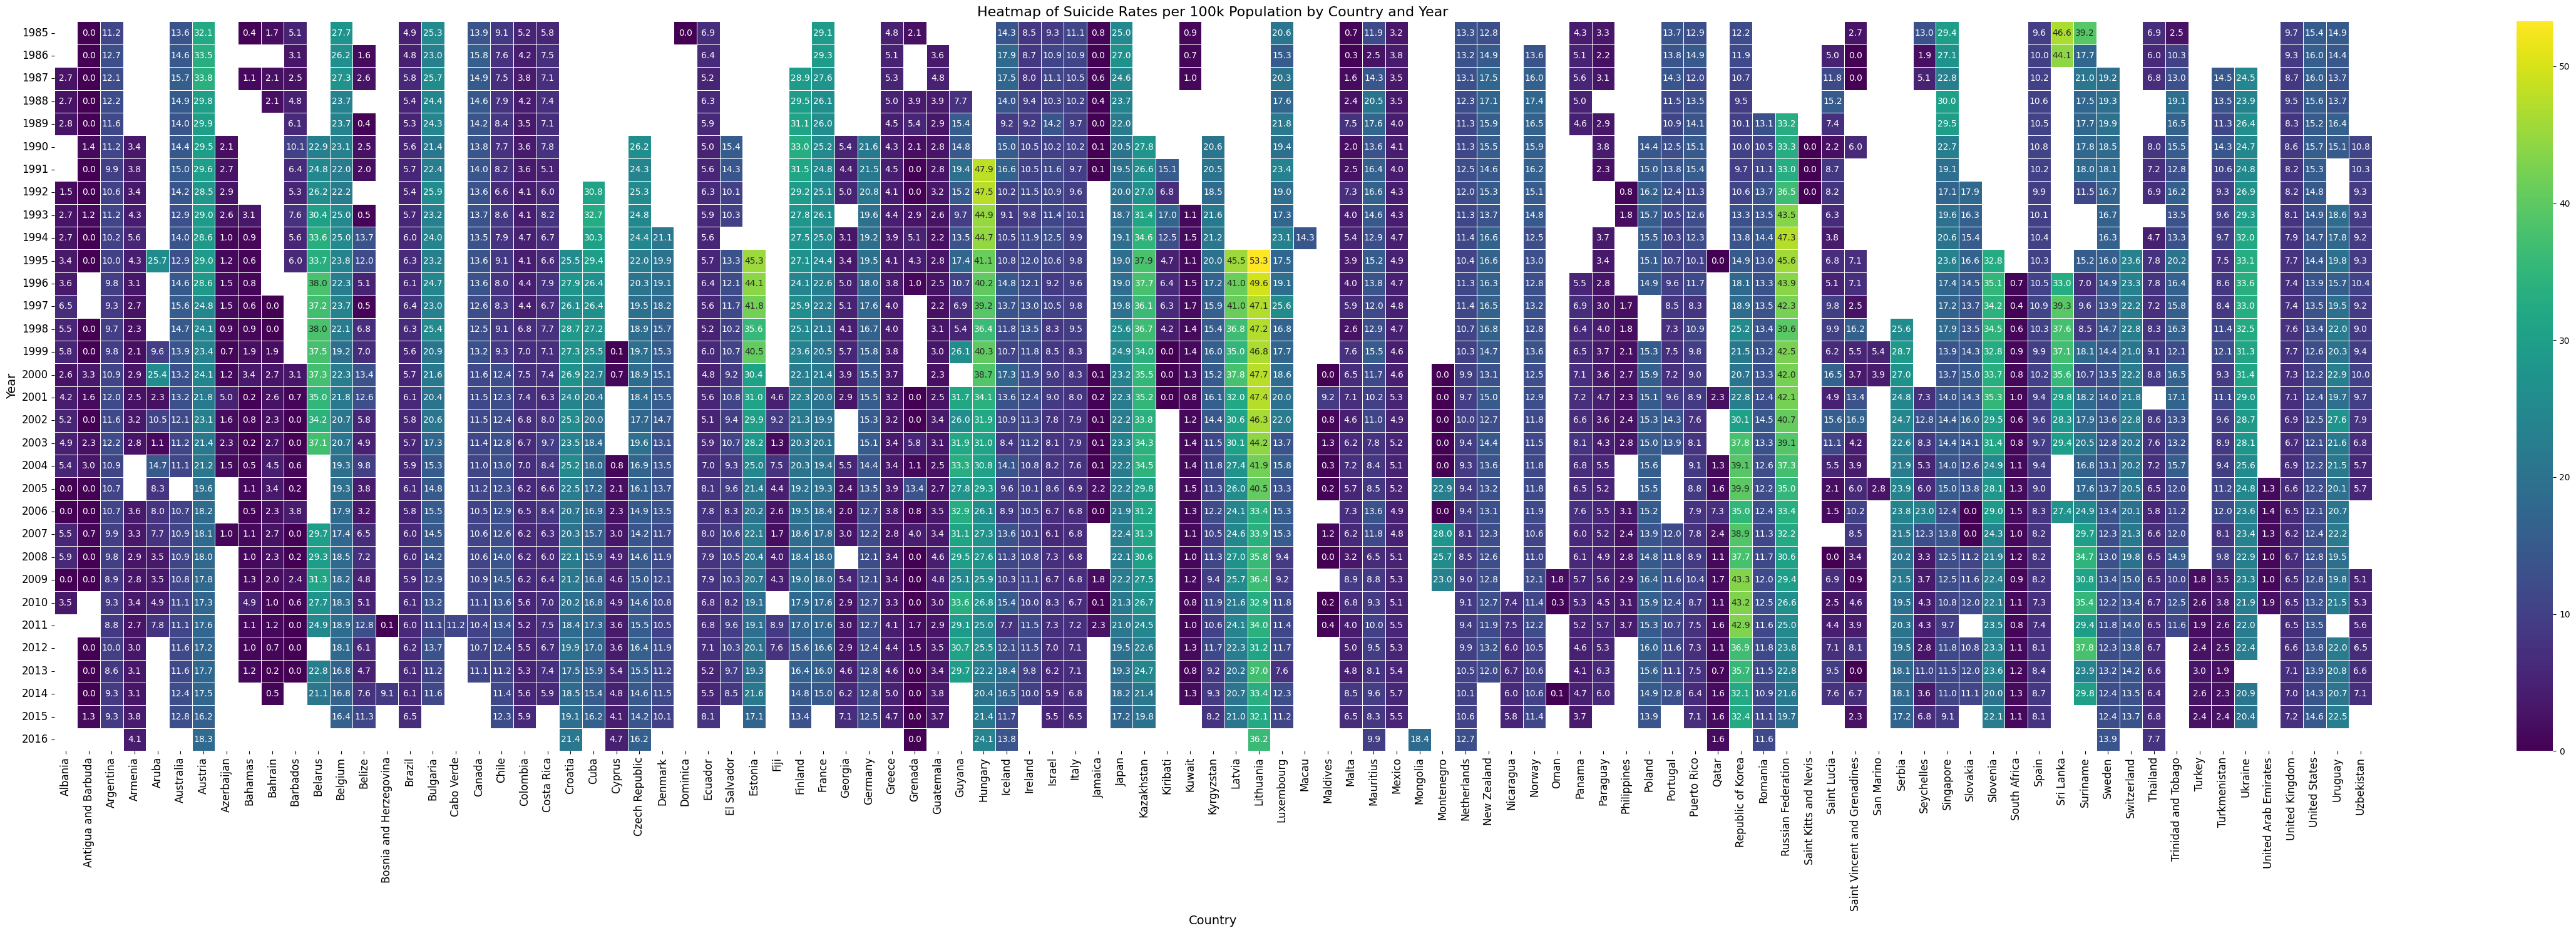

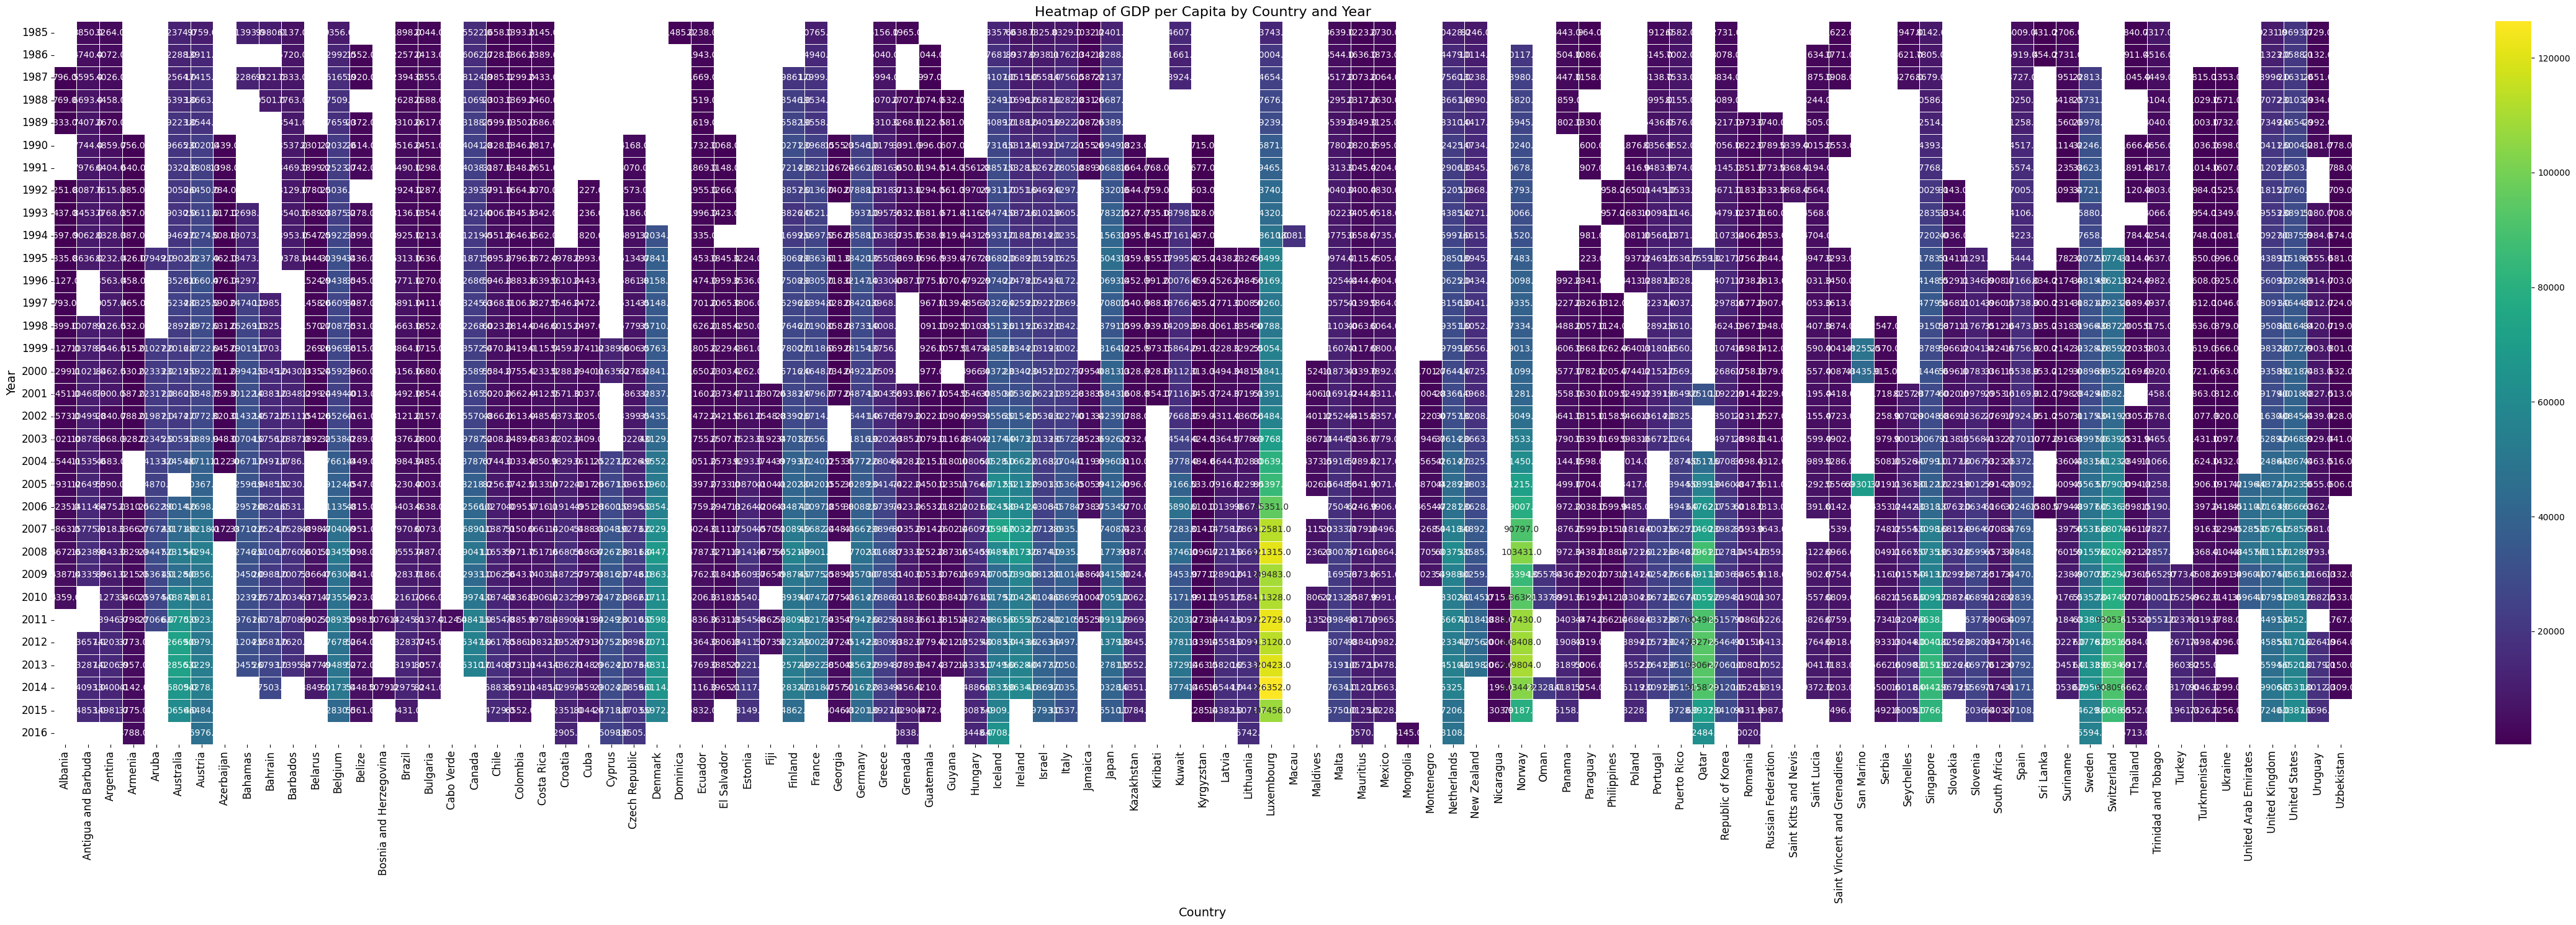

Correlation Matrix:
                   gdp_for_year  gdp_per_capita  suicides/100k pop  \
gdp_for_year               1.00            0.30               0.05   
gdp_per_capita             0.30            1.00               0.00   
suicides/100k pop          0.05            0.00               1.00   
suicides_no                0.66            0.09               0.34   

                   suicides_no  
gdp_for_year              0.66  
gdp_per_capita            0.09  
suicides/100k pop         0.34  
suicides_no               1.00  


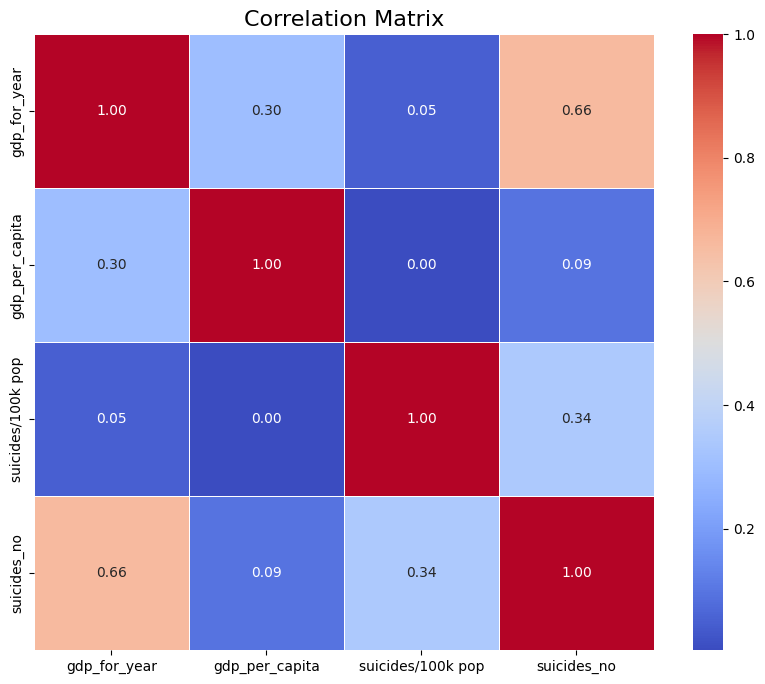

In [10]:
# Heatmaps for Year/GDP for countries and Year/Suicide rates
#TODO Need to fix this since it's not super good for reasoning????

def create_heatmap(data, title):
    # Calculate aspect ratio
    aspect_ratio = data.shape[0] / data.shape[1]
    
    # Create figure and axis
    plt.figure(figsize=(15 * aspect_ratio, 15))
    ax = sns.heatmap(data.transpose(), cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
    
    # Set axis labels and title
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    plt.yticks(rotation=0)
    plt.title(title, fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Create heatmap for Suicide Rates per 100k Population
heatmap_data_suicide = sorted_df.pivot(index='country', columns='year', values='suicides/100k pop')
create_heatmap(heatmap_data_suicide, 'Heatmap of Suicide Rates per 100k Population by Country and Year')

# Create heatmap for GDP per Capita
heatmap_data_gdp = sorted_df.pivot(index='country', columns='year', values='gdp_per_capita')
create_heatmap(heatmap_data_gdp, 'Heatmap of GDP per Capita by Country and Year')

# Calculate correlation matrix
correlation_matrix = gdp_country[['gdp_for_year', 'gdp_per_capita', 'suicides/100k pop', 'suicides_no']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()